In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
corpus = [
    "I love NLP. I love machine learning",
    "I love deep learning",
    "Machine learning requires data"
]

In [10]:
# BoW
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform documents into BoW
X = vectorizer.fit_transform(corpus)

# Convert to dense matrix (for readability)
bow_matrix = X.toarray()

# Get feature names (vocabulary)
vocab = vectorizer.get_feature_names_out()

print("Vocabulary:", vocab)
print("BoW Matrix:\n", bow_matrix)

Vocabulary: ['data' 'deep' 'learning' 'love' 'machine' 'nlp' 'requires']
BoW Matrix:
 [[0 0 1 2 1 1 0]
 [0 1 1 1 0 0 0]
 [1 0 1 0 1 0 1]]


In [12]:
# TFIDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)  # Learns vocabulary & IDF

# Convert to DataFrame
df_tfidf = pd.DataFrame(
    X.toarray(),  # Convert sparse matrix to dense
    columns=vectorizer.get_feature_names_out(),  # Get feature names (words)
    index=["Doc1", "Doc2", "Doc3"]  # Optional: Label documents
)

print(df_tfidf)

          data      deep  learning      love   machine       nlp  requires
Doc1  0.000000  0.000000  0.286801  0.738616  0.369308  0.485596  0.000000
Doc2  0.000000  0.720333  0.425441  0.547832  0.000000  0.000000  0.000000
Doc3  0.584483  0.000000  0.345205  0.000000  0.444514  0.000000  0.584483


In [ ]:
# Get IDF values (log-scaled)
idf_values = vectorizer.idf_

# Map IDF to words
idf_dict = dict(zip(vectorizer.get_feature_names_out(), idf_values))

print("IDF values:")
for word, idf in idf_dict.items():
    print(f"{word}: {idf:.3f}")

IDF values:
data: 1.693
deep: 1.693
learning: 1.000
love: 1.288
machine: 1.288
nlp: 1.693
requires: 1.693


In [14]:
query = "I love deep learning and mango"  # "mango" is new
query_tfidf = vectorizer.transform([query])

# Convert to DataFrame
df_tfidf = pd.DataFrame(
    query_tfidf.toarray(),  # Convert sparse matrix to dense
    columns=vectorizer.get_feature_names_out(),  # Get feature names (words)
    #index=["Doc1", "Doc2", "Doc3"]  # Optional: Label documents
)

print(df_tfidf)

   data      deep  learning      love  machine  nlp  requires
0   0.0  0.720333  0.425441  0.547832      0.0  0.0       0.0


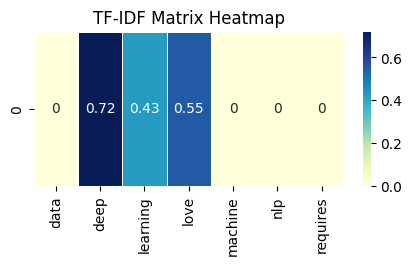

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(5, 2))
sns.heatmap(
    df_tfidf, 
    annot=True,  # Show TF-IDF values
    cmap="YlGnBu",  # Color scheme
    linewidths=0.5
)
plt.title("TF-IDF Matrix Heatmap")
plt.show()

In [39]:
from sklearn.metrics.pairwise import cosine_similarity


# Cosine Similarity
for i in range(3):
    cos_sim = cosine_similarity(X[i], query_tfidf)
    print(cos_sim[0][0])  # Output: ~0.49

0.5266542768570761
1.0
0.14686420843059295
